<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   825 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


<Axes: >

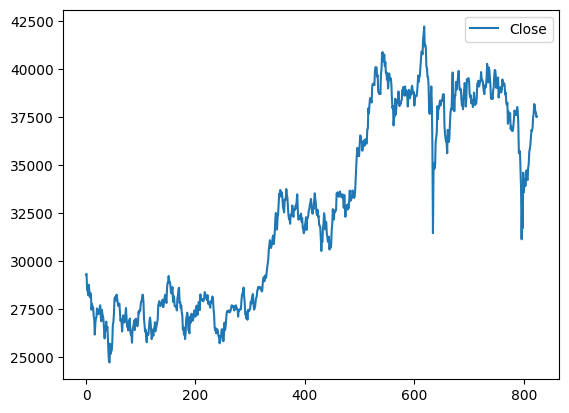

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime
df = pd.read_csv('/Users/wangrong/Desktop/3yrsNIK.csv', 
                 encoding='shift_jis', 
                 skipfooter=1,
                 usecols=["Close"],
                 engine='python')  
df.info()
df.plot()

In [2]:
# #split the data into train and test sets
# train_size = int(len(df) * 0.8)
# train, test = df[:train_size], df[train_size:]


In [3]:
# #set df_train and df_test
# df_train = train.copy()
# df_test = test.copy()
# #convert the index to datetime
# df_train.index = pd.to_datetime(df_train.index)
# df_test.index = pd.to_datetime(df_test.index)


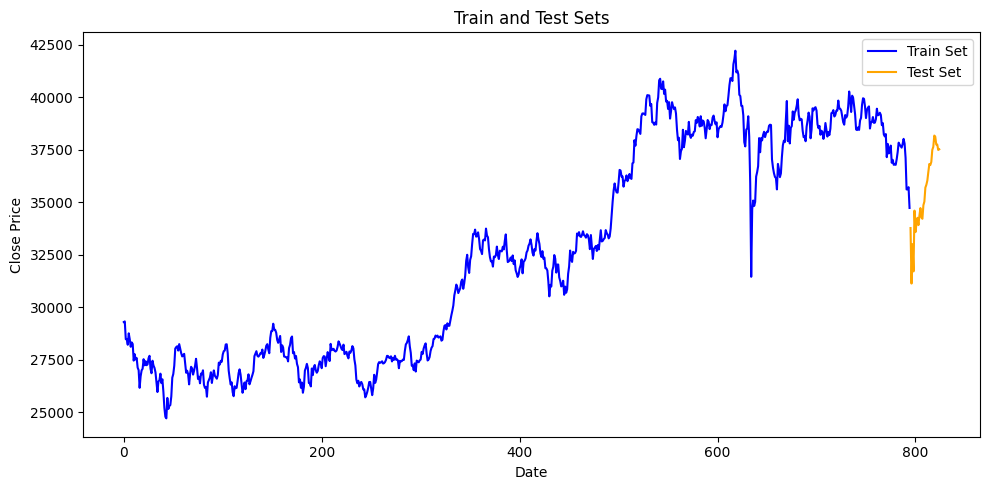

In [4]:
msk = (df.index < len(df)-30)
df_train = df[msk].copy()
df_test = df[~msk].copy()
#plot the train and test sets
plt.figure(figsize=(10, 5))
plt.plot(df_train.index, df_train['Close'], label='Train Set', color='blue')
plt.plot(df_test.index, df_test['Close'], label='Test Set', color='orange')
plt.title('Train and Test Sets')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.tight_layout()
plt.show()
#plot the train and test sets with seaborn

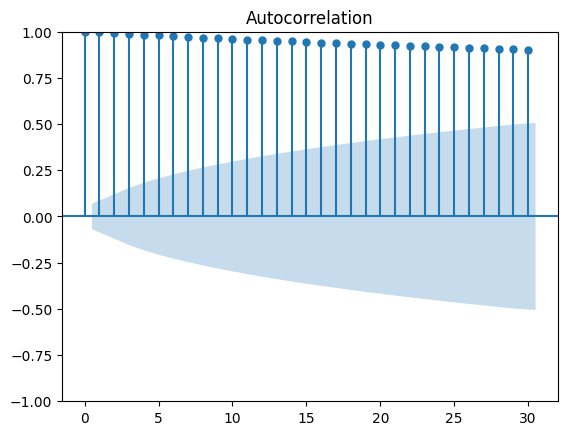

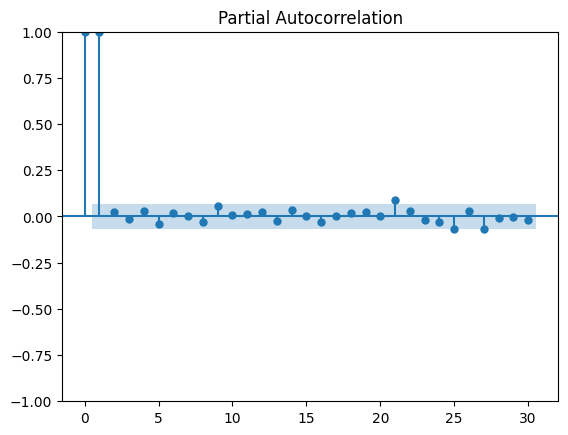

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)
pacf_original = plot_pacf(df_train)

In [6]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.6381340284770413


Transform to stationary: differencing

<Axes: >

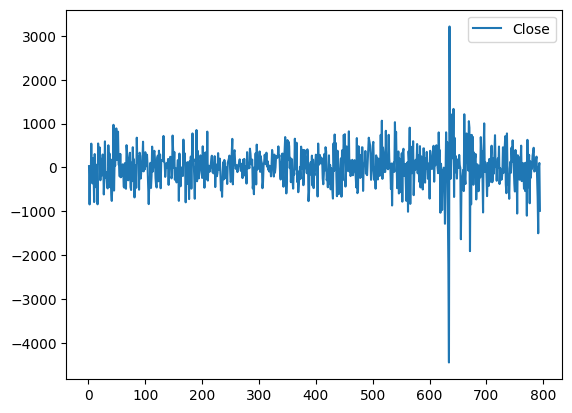

In [7]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

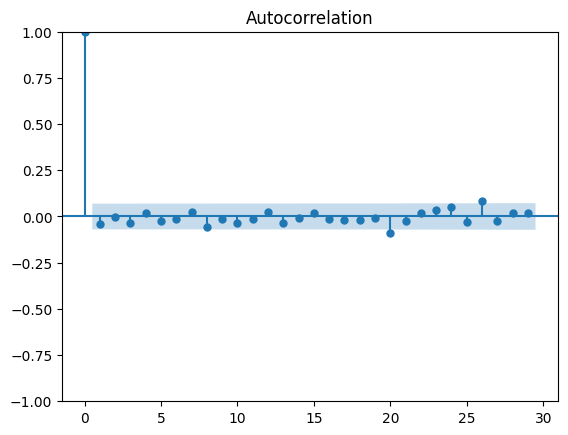

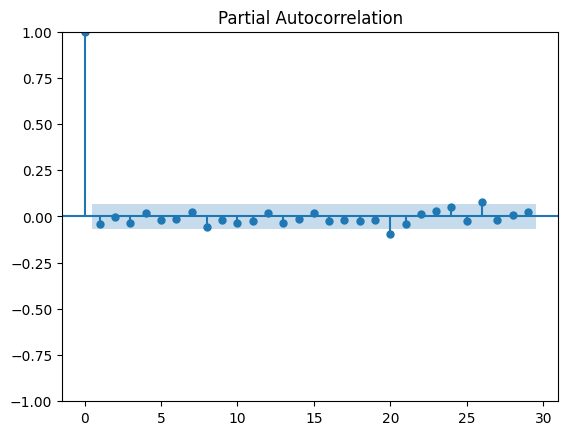

In [8]:
acf_diff = plot_acf(df_train_diff)
pacf_diff = plot_pacf(df_train_diff)

In [9]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')


p-value: 0.0


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  795
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5959.840
Date:                Mon, 09 Jun 2025   AIC                          11925.680
Time:                        15:27:53   BIC                          11939.711
Sample:                             0   HQIC                         11931.072
                                - 795                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8924      0.059     15.138      0.000       0.777       1.008
ma.L1         -0.9287      0.056    -16.572      0.000      -1.039      -0.819
sigma2      1.947e+05   3189.818     61.053      0.0

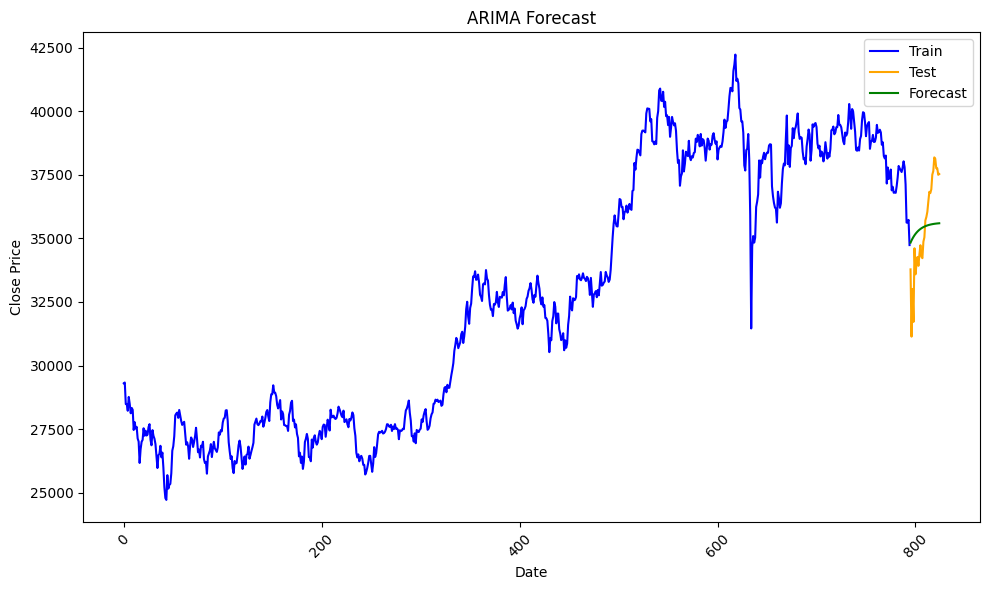

In [10]:
#fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())
# Forecasting
forecast = model_fit.forecast(steps=len(df_test))
# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(df_train.index, df_train['Close'], label='Train', color='blue')
plt.plot(df_test.index, df_test['Close'], label='Test', color='orange')
plt.plot(df_test.index, forecast, label='Forecast', color='green')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Calculate and print the RMSE

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11929.058, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11929.922, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11929.859, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11927.249, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11926.609, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11932.755, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11932.710, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11931.110, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11931.225, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11925.680, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=11928.075, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11928.141, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=11927.648, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]  

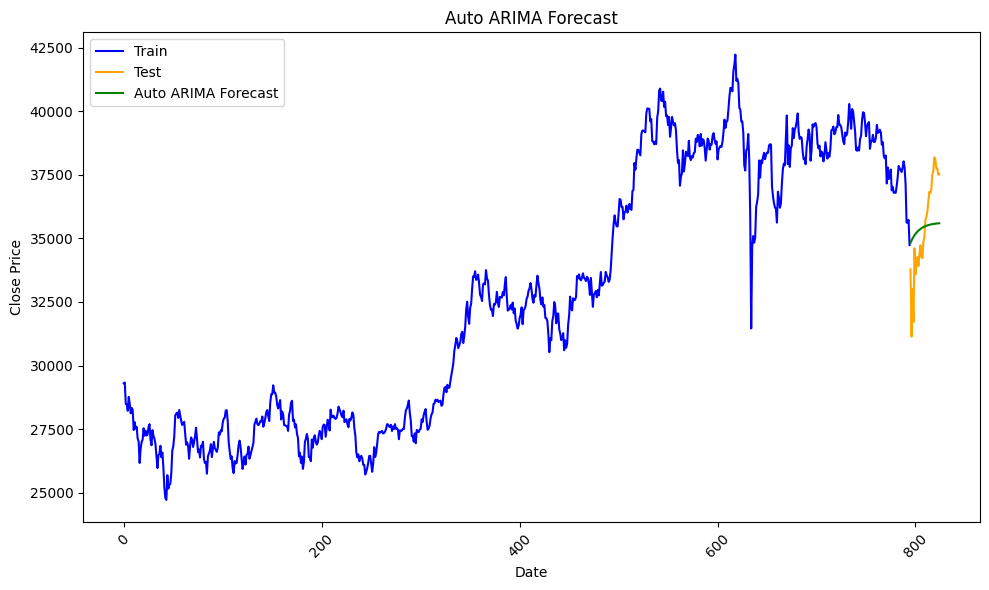

In [11]:
#try auto_arima
from pmdarima import auto_arima
auto_model = auto_arima(df_train, seasonal=False, stepwise=True, trace=True)
# Fit the model
auto_model.fit(df_train)
# Forecasting
forecast_auto = auto_model.predict(n_periods=len(df_test))
# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(df_train.index, df_train['Close'], label='Train', color='blue')
plt.plot(df_test.index, df_test['Close'], label='Test', color='orange')
plt.plot(df_test.index, forecast_auto, label='Auto ARIMA Forecast', color='green')     
plt.title('Auto ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Calculate and print the RMSE for both models

In [12]:
#mae 
from sklearn.metrics import mean_absolute_error
mae_arima = mean_absolute_error(df_test['Close'], forecast)
mae_auto_arima = mean_absolute_error(df_test['Close'], forecast_auto)
print(f'MAE for ARIMA: {mae_arima}')
print(f'MAE for Auto ARIMA: {mae_auto_arima}')

MAE for ARIMA: 1470.8355571641189
MAE for Auto ARIMA: 1470.8355571641189


In [13]:
#compare the two models by calculating RMSE
from sklearn.metrics import mean_squared_error
rmse_arima = np.sqrt(mean_squared_error(df_test['Close'], forecast))
rmse_auto_arima = np.sqrt(mean_squared_error(df_test['Close'], forecast_auto))  
print(f'RMSE for ARIMA: {rmse_arima}')
print(f'RMSE for Auto ARIMA: {rmse_auto_arima}')


RMSE for ARIMA: 1702.7590975217995
RMSE for Auto ARIMA: 1702.7590975217995


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.271e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5913.18
Distribution:                  Normal   AIC:                           11834.4
Method:            Maximum Likelihood   BIC:                           11853.1
                                        No. Observations:                  795
Date:                Mon, Jun 09 2025   Df Residuals:                      794
Time:                        19:09:21   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            22.9664     13.952      1.646  9.975e-02 [ -4.380, 50.31

ValueError: x and y must have same first dimension, but have shapes (30,) and (1, 30)

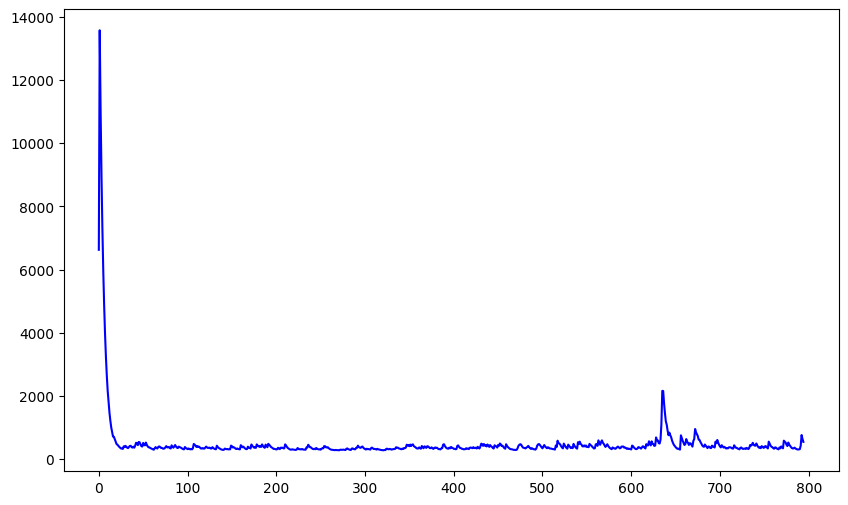

In [15]:
#use residuals to do garch 
from arch import arch_model
# Fit a GARCH model to the residuals of the ARIMA model
residuals = model_fit.resid
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')
# Print the GARCH model summary
print(garch_fit.summary())
# Forecasting volatility using the GARCH model
garch_forecast = garch_fit.forecast(horizon=len(df_test))
# Plotting the GARCH forecast
plt.figure(figsize=(10, 6))
plt.plot(df_train.index, garch_fit.conditional_volatility, label='Conditional Volatility', color='blue')
plt.plot(df_test.index, garch_forecast.variance.values[-len(df_test):], label='GARCH Forecast', color='orange')
plt.title('GARCH Forecast of Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Calculate and print the RMSE for GARCH model